In [2]:
import sys 
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
#sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/ST_DMO/MINE/"))
import matplotlib.pyplot as plt
import seaborn as sns
import pywph as pw
from scipy import stats
sys.path.append(os.path.abspath("../utils/"))
from wph_utils import WPH
sns.set()

# Total Mass Density Maps

In [14]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_IllustrisTNG_CV_z=0.00.npy"
# read the data
tng_maps = np.load(fmaps)
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mtot_SIMBA_CV_z=0.00.npy"
# read the data
simba_maps = np.load(fmaps)
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Magneticum/Images_Mtot_Magneticum_CV_0_z=0.00.npy"
# read the data
mag_maps = np.load(fmaps)
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Astrid/Images_Mtot_Astrid_CV_0_z=0.00.npy"
# read the data
ast_maps = np.load(fmaps)

In [65]:
sum_tng=tng_maps.sum(axis=2).sum(axis=1)
sum_simba=simba_maps.sum(axis=2).sum(axis=1)

In [66]:
total_simba = np.zeros((1000,))
for i in range(15):
    total_simba += sum_simba[i::15]
total_tng = np.zeros((1000,))
for i in range(15):
    total_tng += sum_tng[i::15]

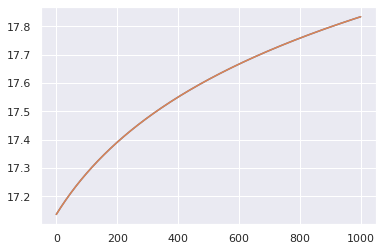

In [81]:
om_tng = np.argsort(tparams[:,0])
om_simba = np.argsort(sparams[:,0])
plt.plot(range(1000),np.log10(total_simba[om_simba]))
plt.plot(range(1000),np.log10(total_tng[om_tng]))

In [9]:
fparams = '/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/params_IllustrisTNG.txt'
# read the dat
tparams = np.loadtxt(fparams)
fparams = '/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/params_SIMBA.txt'
# read the dat
sparams = np.loadtxt(fparams)

### Plots for maps

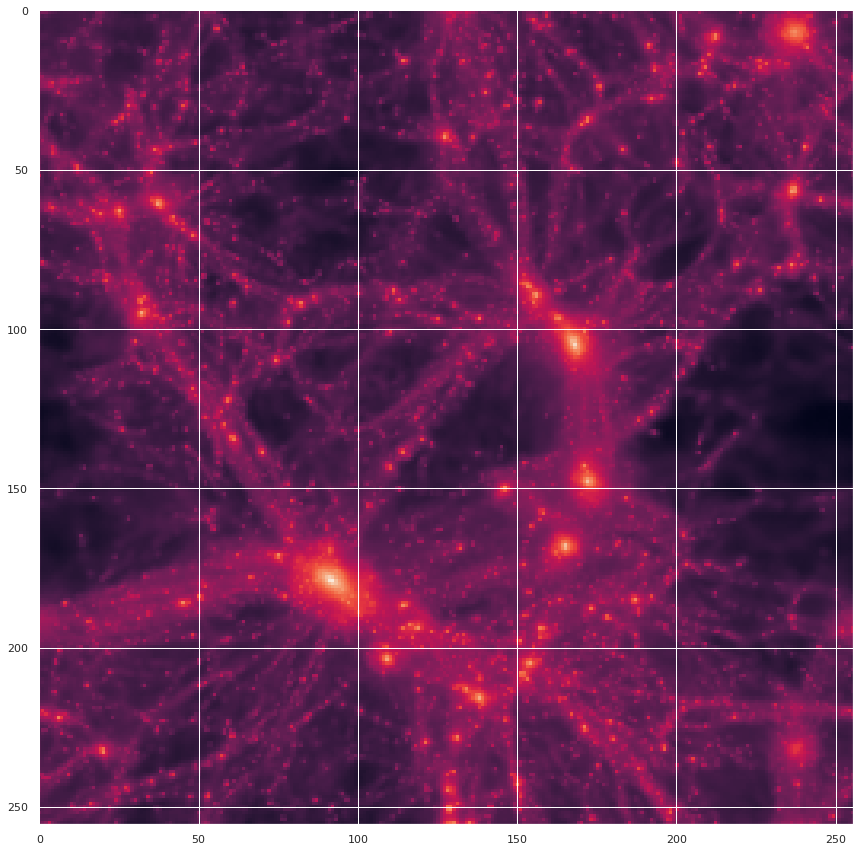

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(tng_maps[0,:]))

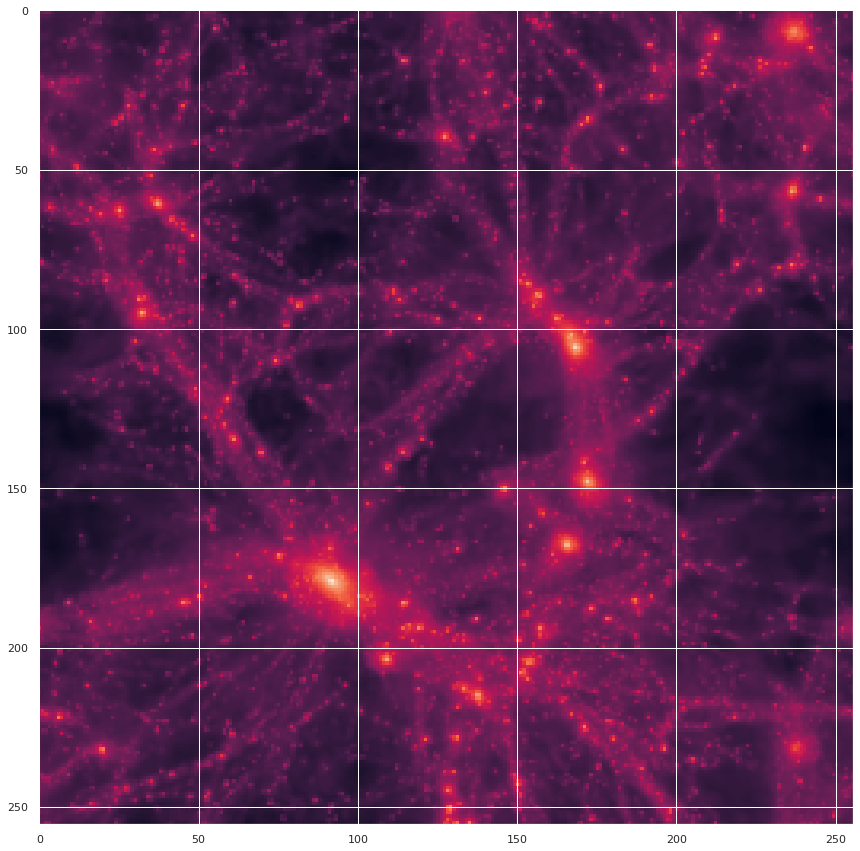

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(simba_maps[0,:]))

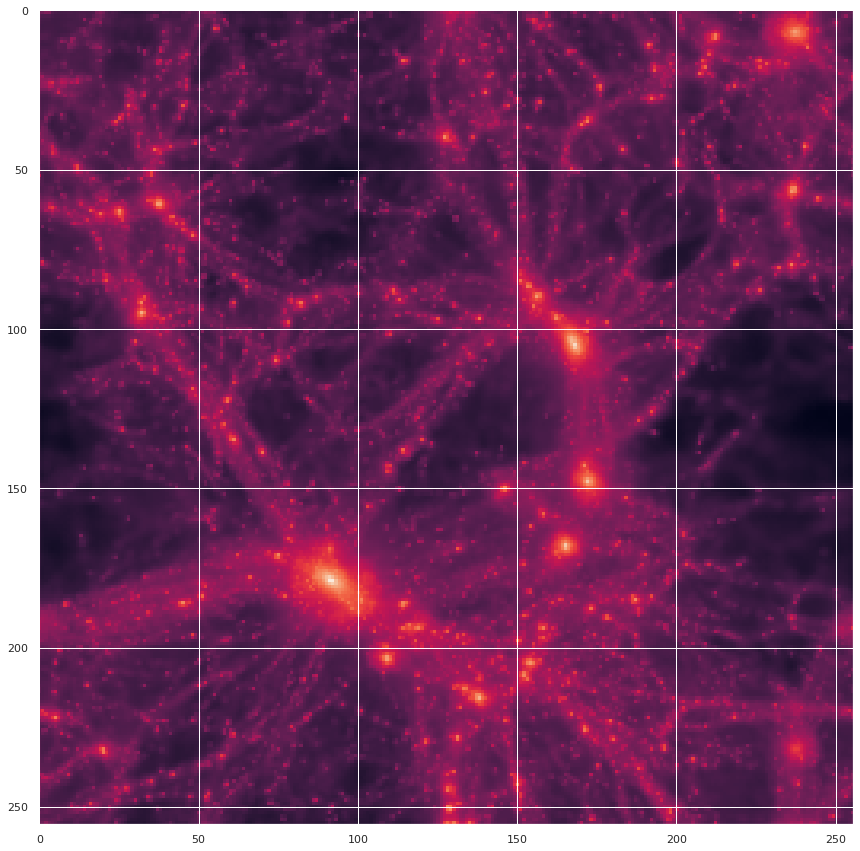

In [17]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(mag_maps[0,:]))

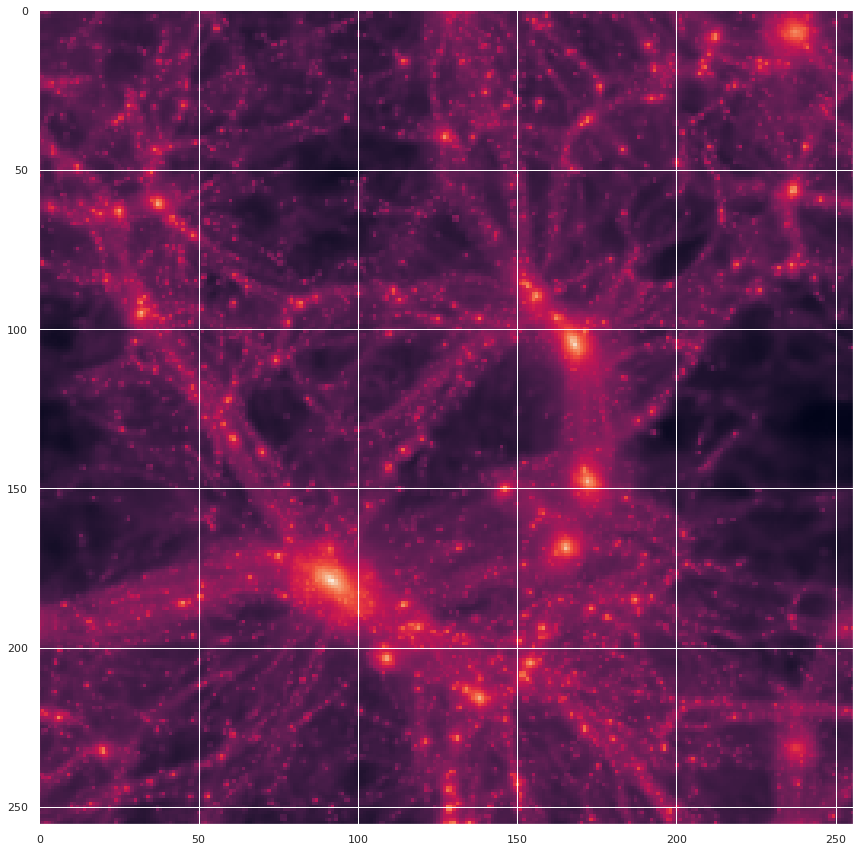

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(np.log10(ast_maps[0,:]))

## Phase Harmonics Scattering Transform

### Examples

In [19]:
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
from imp import reload 
from wph_utils import WPH
import wph_utils
# Change in mymodule/'
reload(wph_utils)
import plt_utils
from plt_utils import generateAxesForMultiplePlots
import plt_utils
import scipy
# Change in mymodule/'
reload(plt_utils)

<module 'plt_utils' from '/mnt/home/yjo10/ceph/myutils/plt_utils.py'>

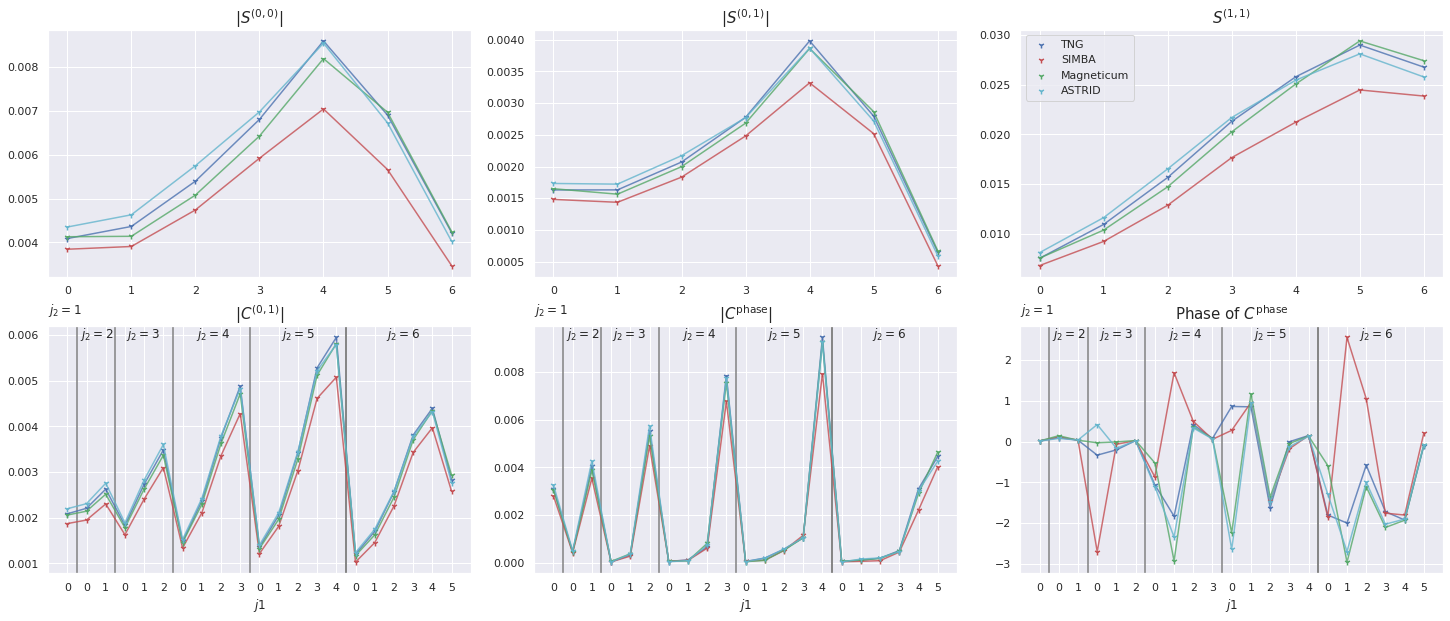

In [28]:
J = 7; L = 4; dn = 0; i=0
wph_tng = WPH(data=np.log(tng_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(4):
        if x == 2 and y == 1:
            X = np.angle(coefs[j][name])
        else:
            X = np.absolute(coefs[j][name])
        axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

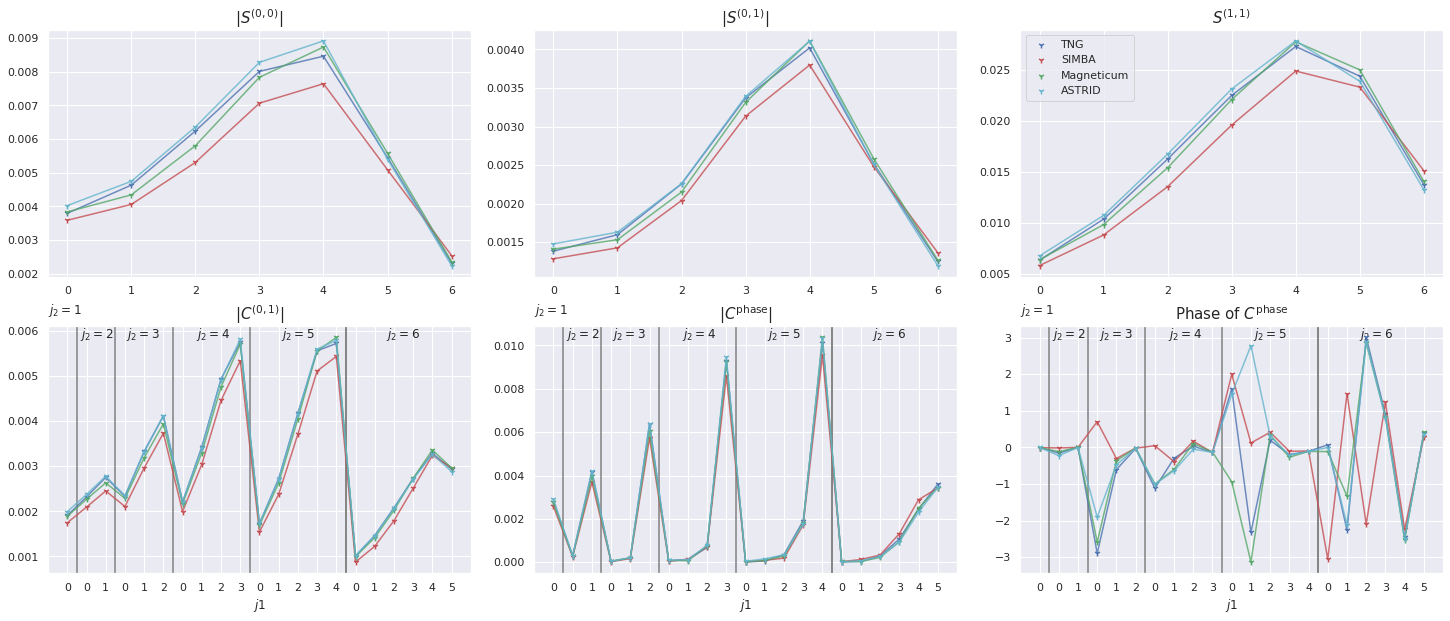

In [29]:
J = 7; L = 4; dn = 0; i=5
wph_tng = WPH(data=np.log(tng_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(4):
        if x == 2 and y == 1:
            X = np.angle(coefs[j][name])
        else:
            X = np.absolute(coefs[j][name])
        axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

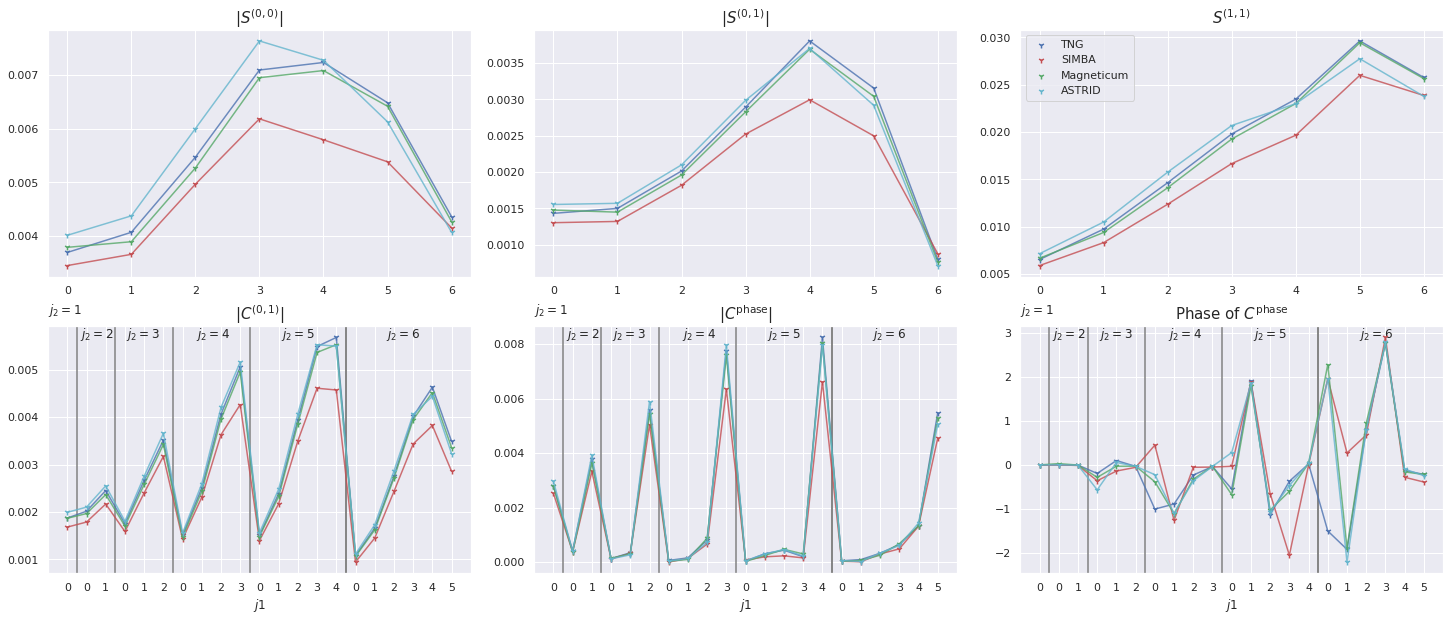

In [30]:
J = 7; L = 4; dn = 0; i=10
wph_tng = WPH(data=np.log(tng_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(4):
        if x == 2 and y == 1:
            X = np.angle(coefs[j][name])
        else:
            X = np.absolute(coefs[j][name])
        axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

## Residual

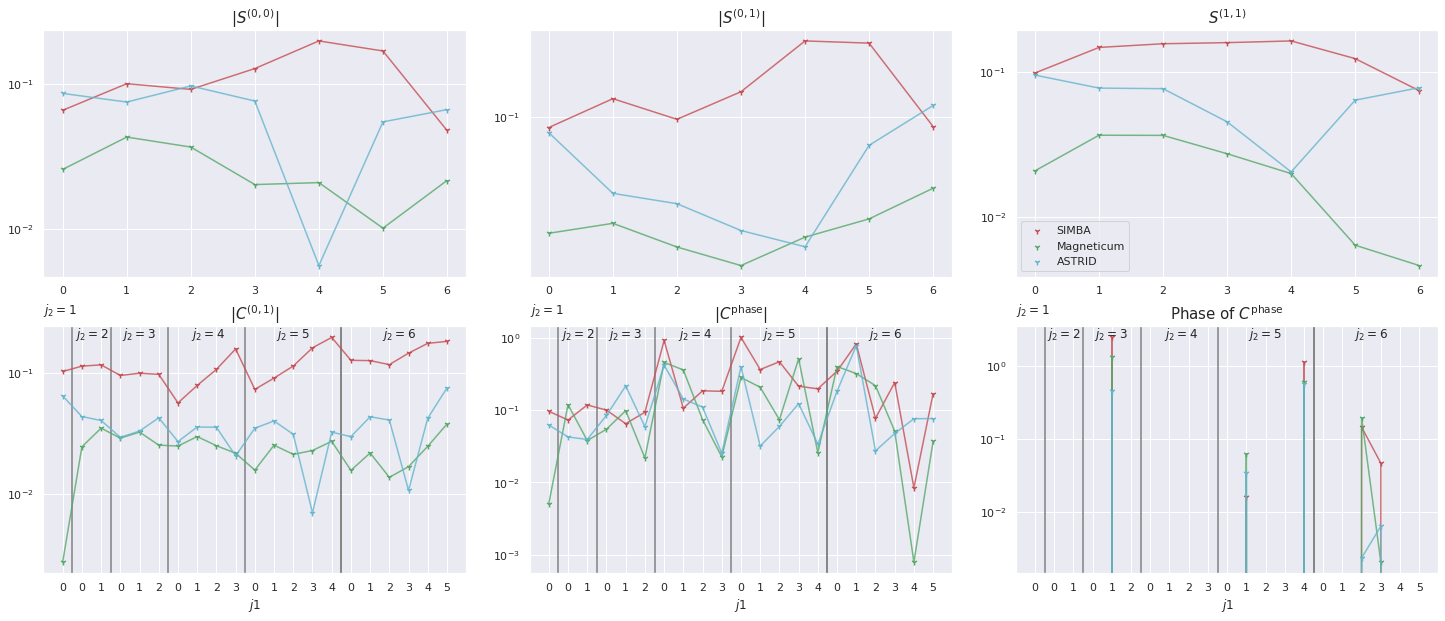

In [32]:
J = 7; L = 4; dn = 0; i=10
wph_tng = WPH(data=np.log(tng_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(1,4):
        if x == 2 and y == 1:
            X = np.abs(np.angle(coefs[j][name])-np.angle(coefs[0][name]))/np.angle(coefs[0][name])
        else:
            X = np.abs(np.absolute(coefs[j][name])-np.absolute(coefs[0][name]))/np.absolute(coefs[0][name])
        axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
    axes[x,y].set_yscale("log")
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

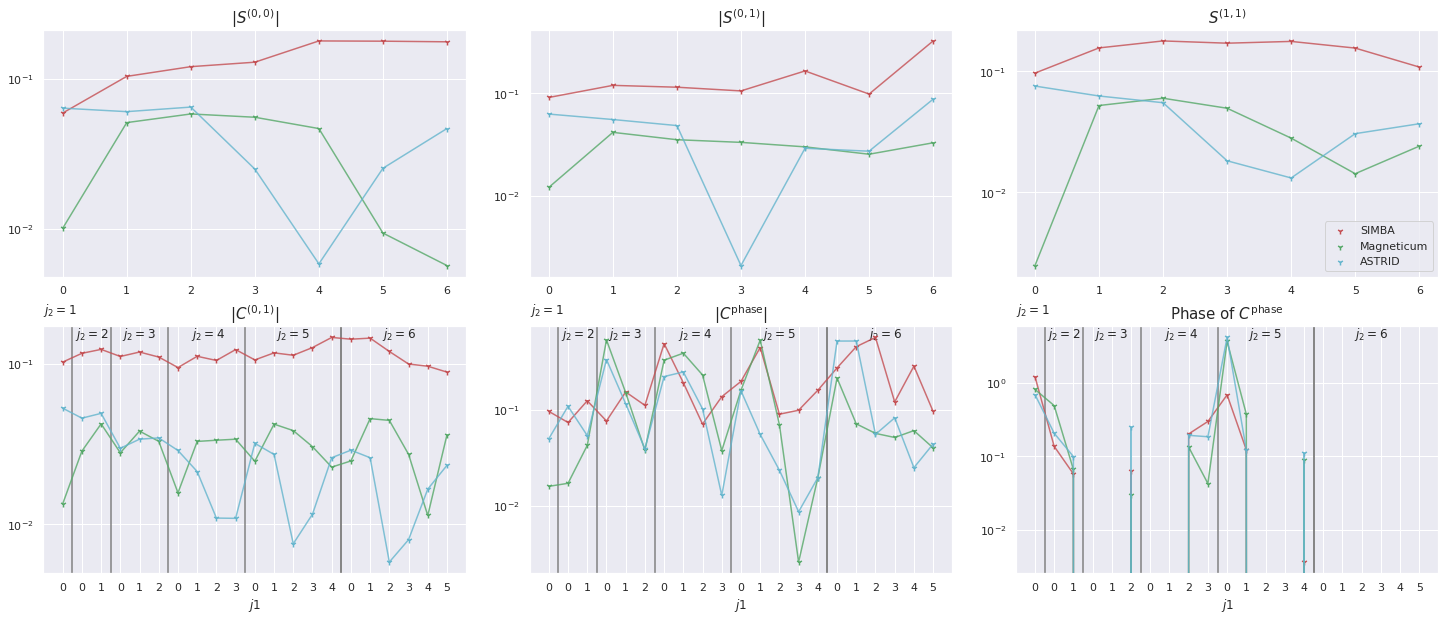

In [33]:
J = 7; L = 4; dn = 0; i=0
wph_tng = WPH(data=np.log(tng_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[i,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(1,4):
        if x == 2 and y == 1:
            X = np.abs(np.angle(coefs[j][name])-np.angle(coefs[0][name]))/np.angle(coefs[0][name])
        else:
            X = np.abs(np.absolute(coefs[j][name])-np.absolute(coefs[0][name]))/np.absolute(coefs[0][name])
        axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
    axes[x,y].set_yscale("log")
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

In [35]:
J = 7; L = 4; dn = 0;
wph_tng = WPH(data=np.log(tng_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


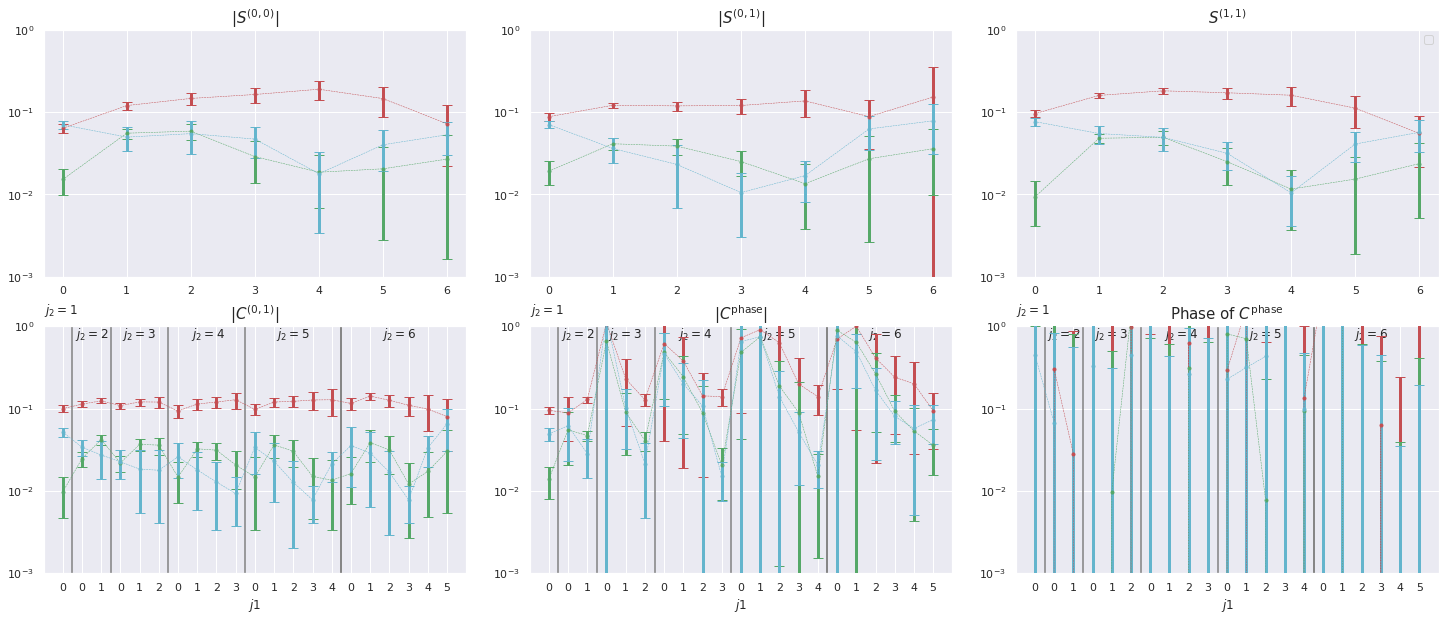

In [40]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(1,4):
        if x == 2 and y == 1:
            X = np.abs(np.angle(coefs[j][name])-np.angle(coefs[0][name]))/np.angle(coefs[0][name])
        else:
            X = np.abs(np.absolute(coefs[j][name])-np.absolute(coefs[0][name]))/np.absolute(coefs[0][name])
        X_mean, X_std = X.mean(axis=0), X.std(axis=0)
        axes[x,y].errorbar(range(X_mean.shape[0]),X_mean,yerr=X_std, color=colors[j],
                           ecolor=colors[j], ls="--", lw=0.5, elinewidth=3, capsize=5,
                           zorder=zorder,fmt='.',label=labels[j])
        #axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        #axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
    axes[x,y].set_yscale("log")
    axes[x,y].set_ylim(1e-3,1e0)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X_mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

## Normalized

In [63]:
ntng_maps = np.log(tng_maps[:15]).reshape(15,-1)
ntng_maps = (ntng_maps.T - ntng_maps.mean(axis=1))/ntng_maps.std(axis=1)
ntng_maps = ntng_maps.T.reshape(15,256,256)
nsimba_maps = np.log(simba_maps[:15]).reshape(15,-1)
nsimba_maps = (nsimba_maps.T - nsimba_maps.mean(axis=1))/nsimba_maps.std(axis=1)
nsimba_maps = nsimba_maps.T.reshape(15,256,256)
nmag_maps = np.log(mag_maps).reshape(15,-1)
nmag_maps = (nmag_maps.T - nmag_maps.mean(axis=1))/nmag_maps.std(axis=1)
nmag_maps = nmag_maps.T.reshape(15,256,256)
nast_maps = np.log(ast_maps).reshape(15,-1)
nast_maps = (nast_maps.T - nast_maps.mean(axis=1))/nast_maps.std(axis=1)
nast_maps = nast_maps.T.reshape(15,256,256)

In [66]:
J = 7; L = 4; dn = 0;
wph_tng = WPH(data=ntng_maps[:15,:],shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=nsimba_maps[:15,:],shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=nmag_maps[:15,:],shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=nast_maps[:15,:],shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

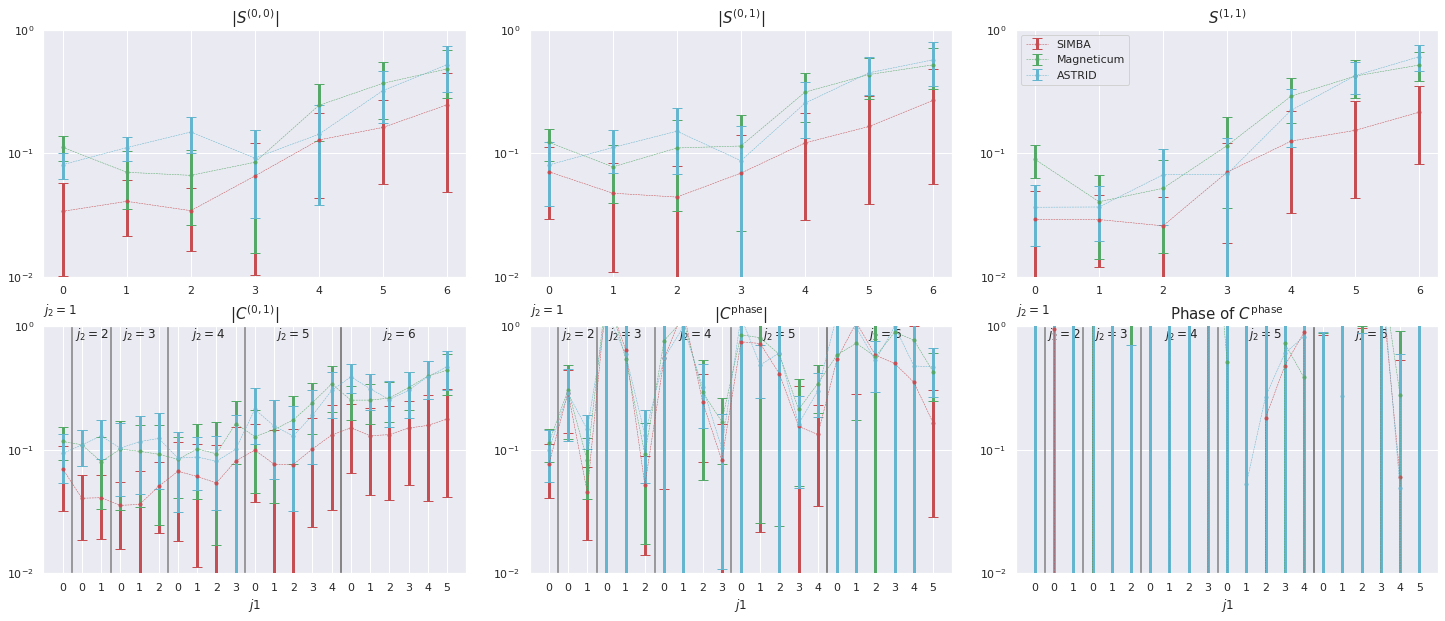

In [67]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(1,4):
        if x == 2 and y == 1:
            X = np.abs(np.angle(coefs[j][name])-np.angle(coefs[0][name]))/np.angle(coefs[0][name])
        else:
            X = np.abs(np.absolute(coefs[j][name])-np.absolute(coefs[0][name]))/np.absolute(coefs[0][name])
        X_mean, X_std = X.mean(axis=0), X.std(axis=0)
        axes[x,y].errorbar(range(X_mean.shape[0]),X_mean,yerr=X_std, color=colors[j],
                           ecolor=colors[j], ls="--", lw=0.5, elinewidth=3, capsize=5,
                           zorder=zorder,fmt='.',label=labels[j])
        #axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        #axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
    axes[x,y].set_yscale("log")
    axes[x,y].set_ylim(1e-2,1e0)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X_mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

# Gas Mass

In [52]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mgas_IllustrisTNG_CV_z=0.00.npy"
# read the data
tng_maps = np.load(fmaps)
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mgas_SIMBA_CV_z=0.00.npy"
# read the data
simba_maps = np.load(fmaps)
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Magneticum/Images_Mgas_Magneticum_CV_0_z=0.00.npy"
# read the data
mag_maps = np.load(fmaps)
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Astrid/Images_Mgas_Astrid_CV_0_z=0.00.npy"
# read the data
ast_maps = np.load(fmaps)

In [53]:
J = 7; L = 4; dn = 0;
wph_tng = WPH(data=np.log(tng_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


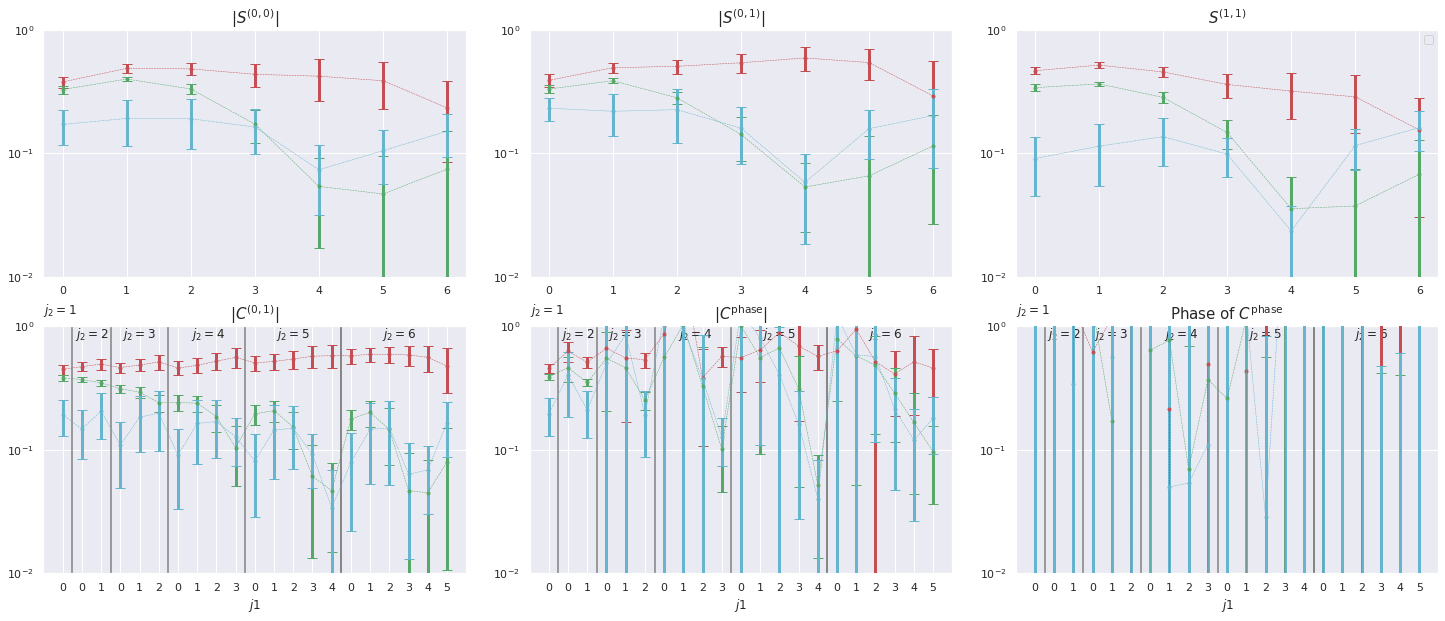

In [54]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(1,4):
        if x == 2 and y == 1:
            X = np.abs(np.angle(coefs[j][name])-np.angle(coefs[0][name]))/np.angle(coefs[0][name])
        else:
            X = np.abs(np.absolute(coefs[j][name])-np.absolute(coefs[0][name]))/np.absolute(coefs[0][name])
        X_mean, X_std = X.mean(axis=0), X.std(axis=0)
        axes[x,y].errorbar(range(X_mean.shape[0]),X_mean,yerr=X_std, color=colors[j],
                           ecolor=colors[j], ls="--", lw=0.5, elinewidth=3, capsize=5,
                           zorder=zorder,fmt='.',label=labels[j])
        #axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        #axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
    axes[x,y].set_yscale("log")
    axes[x,y].set_ylim(1e-2,1e0)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X_mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

# Star Mass

In [57]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mstar_IllustrisTNG_CV_z=0.00.npy"
# read the data
tng_maps = np.load(fmaps)
tng_maps[tng_maps <= 0.0] = 1
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mstar_SIMBA_CV_z=0.00.npy"
# read the data
simba_maps = np.load(fmaps)
simba_maps[simba_maps <= 0.0] = 1
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Magneticum/Images_Mstar_Magneticum_CV_0_z=0.00.npy"
# read the data
mag_maps = np.load(fmaps)
mag_maps[mag_maps <= 0.0] = 1
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Astrid/Images_Mstar_Astrid_CV_0_z=0.00.npy"
# read the data
ast_maps = np.load(fmaps)
ast_maps[ast_maps <= 0.0] = 1

In [58]:
J = 7; L = 4; dn = 0;
wph_tng = WPH(data=np.log(tng_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

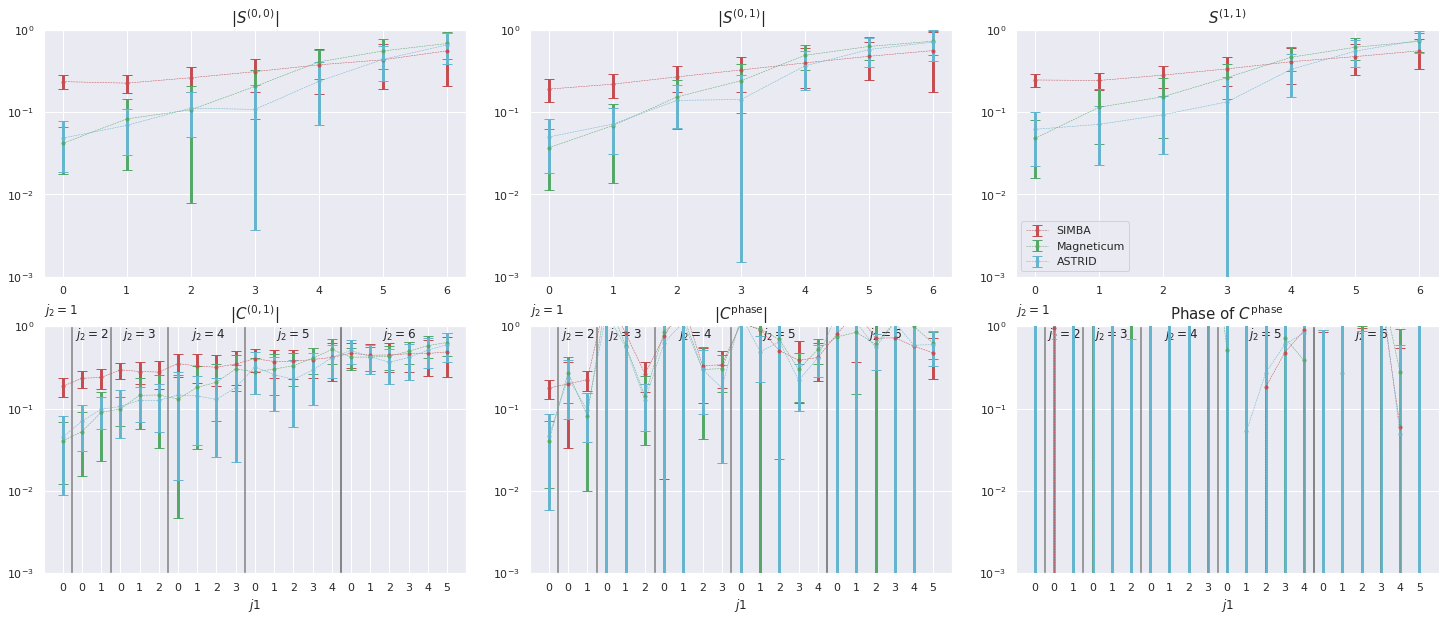

In [60]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(1,4):
        if x == 2 and y == 1:
            X = np.abs(np.angle(coefs[j][name])-np.angle(coefs[0][name]))/np.angle(coefs[0][name])
        else:
            X = np.abs(np.absolute(coefs[j][name])-np.absolute(coefs[0][name]))/np.absolute(coefs[0][name])
        X_mean, X_std = X.mean(axis=0), X.std(axis=0)
        axes[x,y].errorbar(range(X_mean.shape[0]),X_mean,yerr=X_std, color=colors[j],
                           ecolor=colors[j], ls="--", lw=0.5, elinewidth=3, capsize=5,
                           zorder=zorder,fmt='.',label=labels[j])
        #axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        #axes[x,y].scatter(range(X.shape[0]),X,c=colors[j],marker='1',zorder=zorder, label=labels[j])
    axes[x,y].set_title(titles[i], fontsize=15)
    axes[x,y].set_yscale("log")
    axes[x,y].set_ylim(1e-3,1e0)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X_mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)

# CDM Map

In [68]:
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mcdm_IllustrisTNG_CV_z=0.00.npy"
# read the data
tng_maps = np.load(fmaps)
tng_maps[tng_maps <= 0.0] = 1
fmaps = \
        "/mnt/home/fvillaescusa/CAMELS/PUBLIC_RELEASE/CMD/2D_maps/data/Maps_Mcdm_SIMBA_CV_z=0.00.npy"
# read the data
simba_maps = np.load(fmaps)
simba_maps[simba_maps <= 0.0] = 1
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Magneticum/Images_Mcdm_Magneticum_CV_0_z=0.00.npy"
# read the data
mag_maps = np.load(fmaps)
mag_maps[mag_maps <= 0.0] = 1
fmaps = \
        "/mnt/ceph/users/camels/Results/images_Astrid/Images_Mcdm_Astrid_CV_0_z=0.00.npy"
# read the data
ast_maps = np.load(fmaps)
ast_maps[ast_maps <= 0.0] = 1

In [69]:
J = 7; L = 4; dn = 0;
wph_tng = WPH(data=np.log(tng_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_simba = WPH(data=np.log(simba_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_mag = WPH(data=np.log(mag_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
wph_ast = WPH(data=np.log(ast_maps[:15,:]),shape=(256, 256), J=J, L=L, dn=dn,device=0)
tcoefs, tmodes = wph_tng.getAllIsoCoeffs()
scoefs, smodes = wph_simba.getAllIsoCoeffs()
mcoefs, mmodes = wph_mag.getAllIsoCoeffs()
acoefs, amodes = wph_ast.getAllIsoCoeffs()
coefs = [tcoefs, scoefs, mcoefs, acoefs]
labels = ["TNG", "SIMBA", "Magneticum", "ASTRID"]
colors = ["b", "r", "g", "c"]

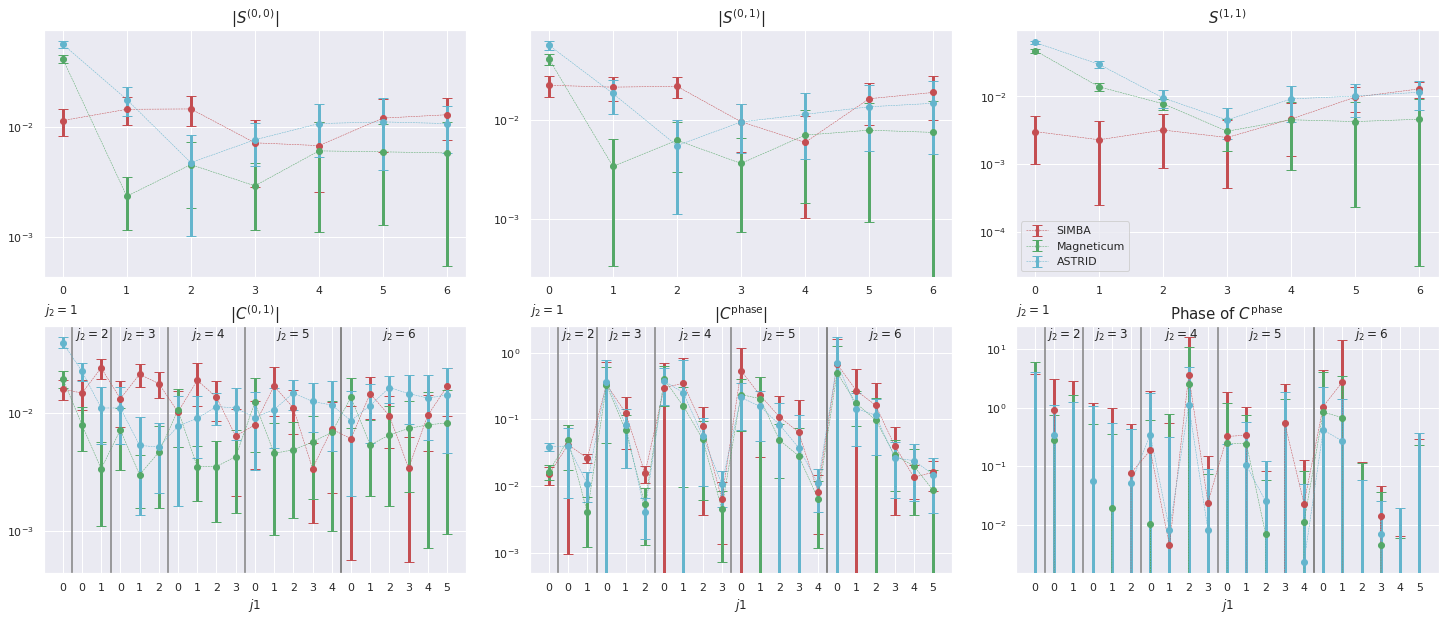

In [75]:
axes = generateAxesForMultiplePlots(shape=(3,2),figsize=(25,10),wspace=0.15,hspace=0.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times'
zorder = 10; alpha=0.8
titles = ["$|S^{(0,0)}|$","$|S^{(0,1)}|$","$S^{(1,1)}$","$|C^{(0,1)}|$","$|C^\mathrm{phase}|$","Phase of $C^\mathrm{phase}$"]
for i, name in enumerate(wph_tng.getCoefNames()+["Cphase"]):
    x = i % 3; y = i // 3
    for j in range(1,4):
        if x == 2 and y == 1:
            X = np.abs(np.angle(coefs[j][name])-np.angle(coefs[0][name]))/np.angle(coefs[0][name])
        else:
            X = np.abs(np.absolute(coefs[j][name])-np.absolute(coefs[0][name]))/np.absolute(coefs[0][name])
        X_mean, X_std = X.mean(axis=0), X.std(axis=0)
        axes[x,y].errorbar(range(X_mean.shape[0]),X_mean,yerr=X_std, color=colors[j],
                           ecolor=colors[j], ls="--", lw=0.5, elinewidth=3, capsize=5,
                           zorder=zorder,fmt='.',label=labels[j])
        #axes[x,y].plot(range(X.shape[0]),X,c=colors[j],ls="-",alpha=alpha,zorder=zorder)
        axes[x,y].scatter(range(X_mean.shape[0]),X_mean,c=colors[j],marker='o',zorder=20)
    axes[x,y].set_title(titles[i], fontsize=15)
    axes[x,y].set_yscale("log")
    #axes[x,y].set_ylim(1e-3,1e0)
axes[2,0].legend()


for i in range(3):
    j1  = [0.5, 2.5, 5.5, 9.5, 14.5,14.5]
    j2  = list(range(1,7))
    pos = [[0.0,1.1],[0.075,1.00],[0.185,1.00],
           [0.35,1.00],[0.55,1.00],[0.8,1.00]];
    for j, jj in enumerate(j1):
        axes[i,1].axvline(x=jj,c="grey",zorder=1)
        axes[i,1].text(*pos[j],"$j_2=${}".format(j2[j]),transform=axes[i,1].transAxes,
                       verticalalignment='top', horizontalalignment='left')
    axes[i,1].set_xticks(list(range(X_mean.shape[0])))
    axes[i,1].set_xticklabels([0,0,1,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5])
    axes[i,1].set_xlabel("$j1$")   
#plt.savefig("linear_correlation.png",dpi=400)